# Main analysis of data
## This notebook is intended to be a structured results collection from tools developed locally
### more infoo



---


# Statistics
---
### Envelope enhancer


In [102]:
from ski_analys import DataRecord, simple_segmentation, envelope_enhancer, savgol_helper, enhanced_fft
import pathlib
import os
# generate data to analyze
csv_data_path = pathlib.Path("csv_data/")
result_path = pathlib.Path("testing/")
for file in csv_data_path.iterdir():
    enhanced_fft(file=file, save_path="testing/", enhance_method=envelope_enhancer, filter=savgol_helper, window_length=20, polyorder=3, axis=0, n_out=50, width=(1, None), prominence =(None, 20), detrending=False)
print("Done!")

Done!


In [6]:
import pathlib
from ski_analys import DataRecord, simple_segmentation, envelope_enhancer

In [7]:
# try instantiating each record with DataRecord

result_path = pathlib.Path("testing/")
data = [DataRecord(file) for file in result_path.iterdir() if file.is_file()]
x_data = [x for x in data if x.metadata['coord'] == 'x']
y_data = [x for x in data if x.metadata['coord'] == 'y']
z_data = [x for x in data if x.metadata['coord'] == 'z']


In [8]:
import matplotlib.pyplot as plt
import numpy as np
highest_freqs = []
for obj in x_data:
    freq, mag = zip(*obj.data)
    index = np.argmax(mag)
    highest_freqs.append(freq[index])

np.var(highest_freqs), np.mean(highest_freqs), np.std(highest_freqs)



(np.float64(41.34406778977845),
 np.float64(3.976587445972662),
 np.float64(6.429935286593361))

0.0

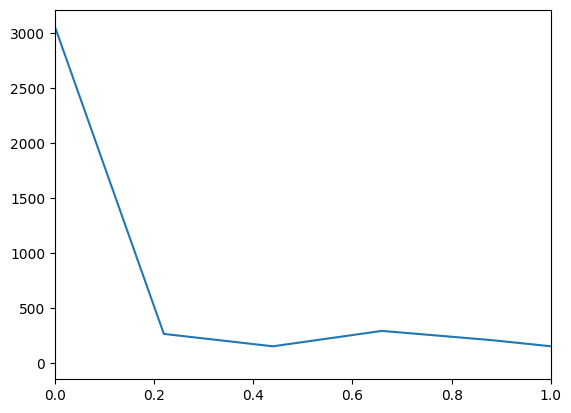

In [13]:
sample = [x for x in data if x.metadata['record'] == "5" and x.metadata['coord'] == 'z' and x.metadata['accel'] == '2']
n = len(sample[0].data)
x,y = zip(*sample[8].data[:n//2])

plt.xlim(0)
plt.plot(x,y)
np.argmax(y)
x[np.argmax(y)]



